In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Delete when combining for final upload---------------------

In [3]:
# Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Display options
pd.set_option('display.max_columns', None)

In [4]:
hr_employee = pd.read_csv( './Data/HR_Employee.csv', delimiter = ",")
Attrition = pd.read_csv( './Data/Attrition.csv', delimiter = ",")

In [5]:
X = hr_employee
# Y = Attrition.values.ravel()
Y = Attrition

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1176, 69) (1176, 1)
(294, 69) (294, 1)


#### Functions

In [7]:

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Function:    gridSearcBestEstimator
# Input:       Classifier, parameters, cross validation
# Output:      Prints Best Estimator
# Returns:     Best Estimator
def gridSearcBestEstimator(model, params, cv):
    clf = model 
    gs = GridSearchCV(estimator=clf, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

    gs.fit(X_train, y_train.values.ravel())
    best_estimator = gs.best_estimator_
    
    print('Best Estimator:')
    print(best_estimator,'\n')
    
    #if model == DecisionTreeClassifier():
    #    best_estimator.get_depth()

    return best_estimator

In [8]:
# Function:    fitModel
# Input:       Classifier
# Returns:     Fitted Model
def fitModel(model):
    clf = model
    clf.fit(X_train, y_train.values.ravel())
    
    return clf

In [9]:
from sklearn.metrics import accuracy_score
# Function:    modelAccuracy
# Input:       Classifier with Best Estimator
# Output:      Prints Training & Testing Accuracy
# Returns:     Y Test Predictions
def modelAccuracy(model):
    clf = model
    
    # Make Train predictions
    y_train_pred = clf.predict(X_train)
    # Calculate accuracy score
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print('Training Accuracy: ',training_accuracy)
    # confusionMatrixMetrics(y_train, y_pred)

    # Make Test predictions
    y_test_pred = clf.predict(X_test)
    # Calculate accuracy scores
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    print('Testing Accuracy:  ',testing_accuracy)
    
    return y_test_pred

In [10]:
from sklearn.metrics import confusion_matrix
# Function:    confusionMatrix
# Input:       Training/Testing dataframe and predictions
# Output:      Prints Formatted Confusion Matrix
# Returns:     Confusion Matrix Array
# URL:         https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5
def confusionMatrix(true_test_train, pred):
    true = true_test_train
    
    cm = confusion_matrix(true, pred.round(), normalize=None)

    # Assigning columns names
    cm_df = pd.DataFrame(cm, 
                        columns = ['Predicted Negative', 'Predicted Positive'],
                        index = ['Actual Negative', 'Actual Positive'])
    
    # Printing Formatted Confusion Matrix
    print('\n',cm_df)
    
    return cm

In [11]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# Function:    metrics
# Input:       confusion matrix array, true class values, predicted class values
# Output:      Prints Recall, Sensitivity, Precision, False Positive Rate, Balanced Accuracy & F1 Scores
def metrics(cm, true, pred):
    # Assign values from the confusion matrix to manually 
    # calculate Specificity and False Positive Rate 
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]

    # Recall
    recall = recall_score(true, pred)
    print('\nRecall:                  ', recall)
    # Sensitivity
    sensitivity = recall
    # Specificity
    specificity = (TN / float(TN + FP))
    print('Specificity:             ', specificity)
    # Precision
    precision = precision_score(true, pred)
    print('Precision:               ', precision)
    # False Positive Rate
    # fpr = (FP / float(TN + FP))
    # print ('False Positive Rate:     ', fpr)
    # Balanced Accuracy
    balanced_accuracy = (sensitivity + specificity)/2
    #balance_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
    print('Balanced Accuracy:       ', balanced_accuracy)
    # F1 Score Method 1: sklearn
    F1 = f1_score(true, pred)
    print('F1-Score:                ', F1)
    
    #return recall, specificity, precision, balanced_accuracy, F1, cm_df

### End Delete ----------------------------------------------------

### Decision Tree Pre-processing
Scale Data

In [12]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Performance on default decision tree model

In [13]:
# Fit Model to Default Classifier
dt_clf = fitModel(DecisionTreeClassifier())

# Calcualate Training and Testing Accuracy
y_test_pred = modelAccuracy(dt_clf)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Print Metrics
metrics(cm, y_test, y_test_pred)

Training Accuracy:  1.0
Testing Accuracy:   0.7551020408163265

                  Predicted Negative  Predicted Positive
Actual Negative                 206                  36
Actual Positive                  36                  16

Recall:                   0.3076923076923077
Specificity:              0.8512396694214877
Precision:                0.3076923076923077
Balanced Accuracy:        0.5794659885568977
F1-Score:                 0.3076923076923077


#### Confusion Matrix for default model

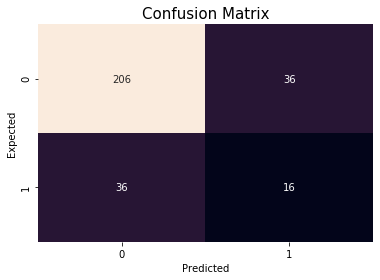

In [14]:
# Confusion Matrix
cm_plot =  pd.crosstab(index=y_test.values.ravel(), columns=y_test_pred, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Cross Validation Setup

In [15]:
# Cross Validate
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

### GridSearch CV Decision Tree

In [16]:
# Determine Best Estimator
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
    ccp_alpha = [0.0, 0.010, 0.015, 0.020, 0.025]
)

# best_estimator = GridSearchCV(lr_clf, params,cv=10)
best_estimator = gridSearcBestEstimator(DecisionTreeClassifier(), params, cv)

# # Fit Model to best_estimator
dt_clf = fitModel(best_estimator)

# Calcualate Training and Testing Accuracy
y_test_pred = modelAccuracy(dt_clf)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Print Metrics
metrics(cm, y_test, y_test_pred)

Best Estimator:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

Training Accuracy:  0.8877551020408163
Testing Accuracy:   0.7993197278911565

                  Predicted Negative  Predicted Positive
Actual Negative                 221                  21
Actual Positive                  38                  14

Recall:                   0.2692307692307692
Specificity:              0.9132231404958677
Precision:                0.4
Balanced Accuracy:        0.5912269548633184
F1-Score:                 0.3218390804597701


### Confusion Matrix for Best Estimator

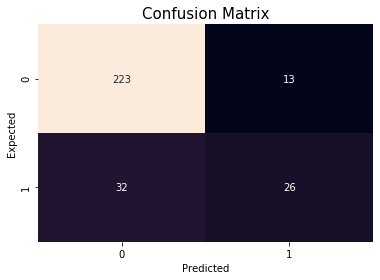

In [15]:
# Confusion Matrix
cm_plot =  pd.crosstab(index=y_test.values.ravel(), columns=y_test_pred, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Visualize best estimator

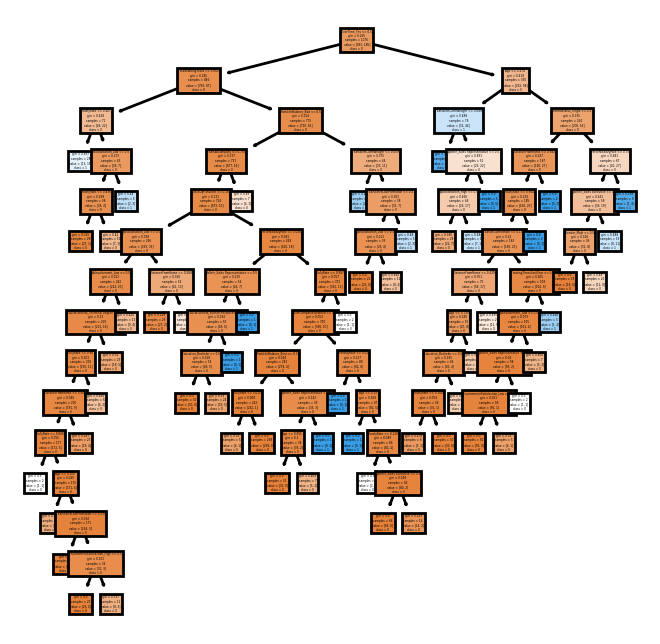

In [18]:
#Visualize decision tree
hr_employee_df = pd.DataFrame(data=hr_employee)
fn=hr_employee_df.columns
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(best_estimator,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Observations
The base decision tree model overfit the training data with default parameters. Training accuracy was 100% and testing accuracy was 75%. Through grid search, the model reduced bias on the model and improved overall performance. The best model chosen performed at training accuracy of 88% and testing accuracy of 80%.